In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [56]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [66]:
df_num = df.select_dtypes(include=[np.number])

y = (df_num["gdpp"] > df_num["gdpp"].median()).astype(int).values
X = df_num.drop(columns=["gdpp"]).values

X = (X - X.mean(axis=0)) / X.std(axis=0)

In [67]:
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

In [68]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for x in X_test:
        # Euclidean distance
        distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]

        values, counts = np.unique(k_labels, return_counts=True)
        predictions.append(values[np.argmax(counts)])

    return np.array(predictions)

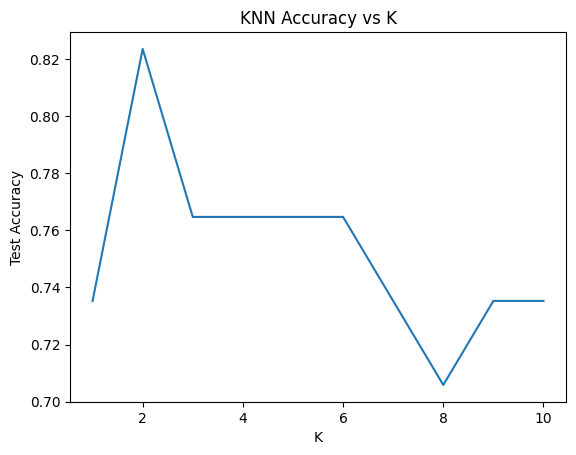

In [70]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

k_values = range(1, 11)
test_accuracies = []

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    test_accuracies.append(accuracy(y_test, y_pred))

plt.figure()
plt.plot(k_values, test_accuracies)
plt.xlabel("K")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()

In [72]:
y_final = knn_predict(X_train, y_train, X_test, best_k)
print("Test Accuracy:", accuracy(y_test, y_final))

Test Accuracy: 0.8235294117647058


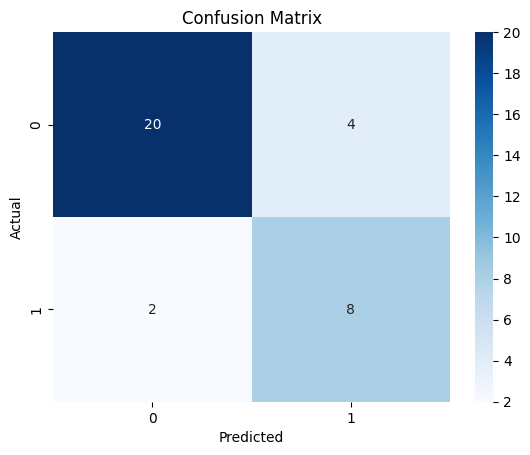

In [73]:
cm = np.zeros((2, 2), dtype=int)

for i in range(len(y_test)):
    cm[y_test[i], y_final[i]] += 1

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

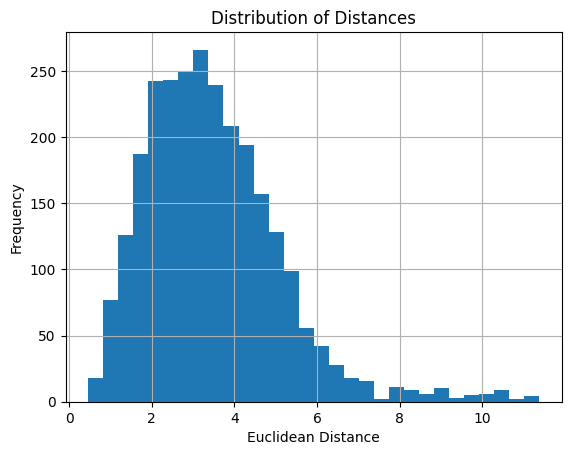

In [75]:
distances = []

for i in range(20):
    distances.extend(
        np.sqrt(np.sum((X_train - X_test[i]) ** 2, axis=1))
    )

plt.figure()
plt.hist(distances, bins=30)
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Distances")
plt.grid(True)
plt.show()

In [77]:
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.5294117647058824
Recall: 0.9
F1-score: 0.6666666666666667
